# BharatIntern Task 3
## 🌸Iris Flowers Classification
Predict the different species of flowers on<br>
the length of there petals and sepals<br>
only Jupyter notebook code.
<br><br>
### 1. Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('bright')
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Loading data using sklearn

In [2]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target 

# Preview of Data
- There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
- There are no null values, so we don't have to worry about that.
- There are 50 observations of each species (setosa, versicolor, virginica).
- Indications
    + setosa => 0
    + versicolor => 1
    + virginica => 2

In [3]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [5]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
data['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

# Data Visualization
- After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.
- There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).


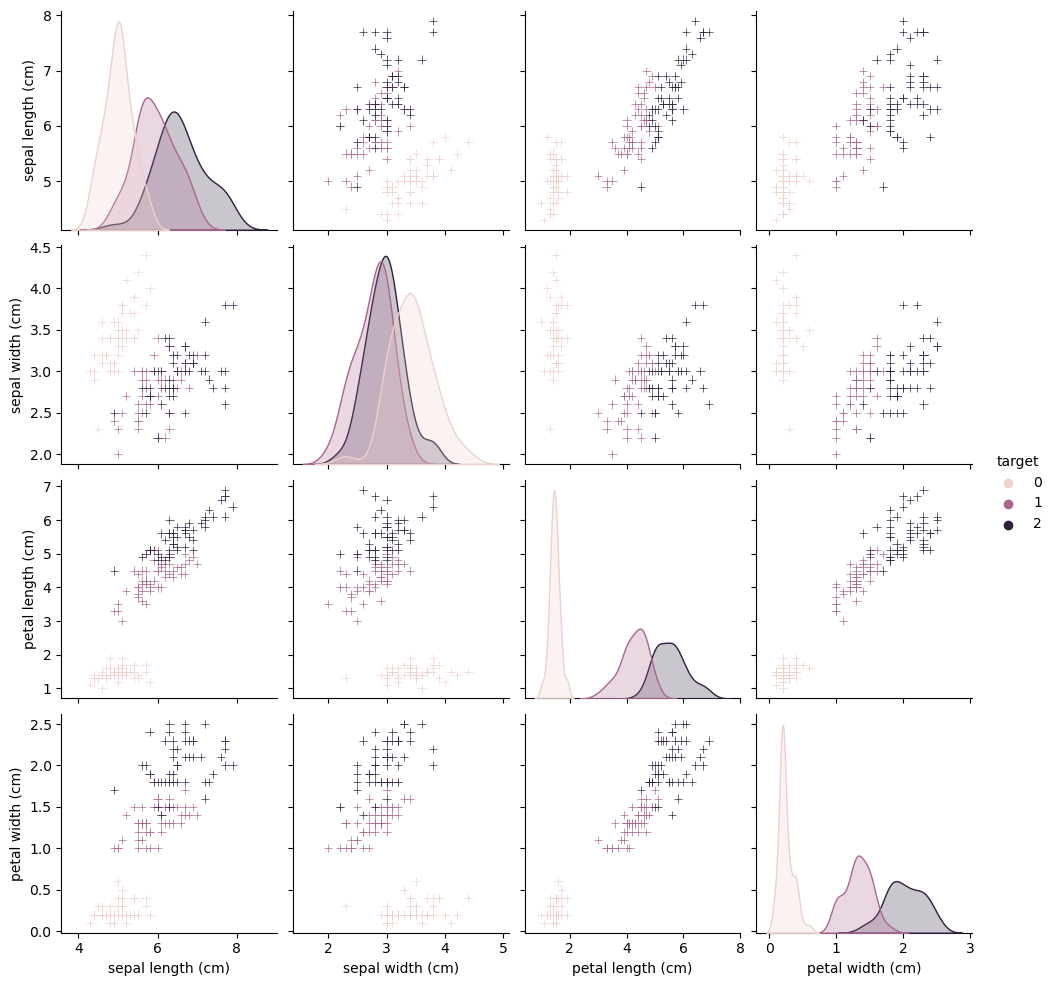

In [7]:
g = sns.pairplot(data, hue='target', markers='+')
plt.show()

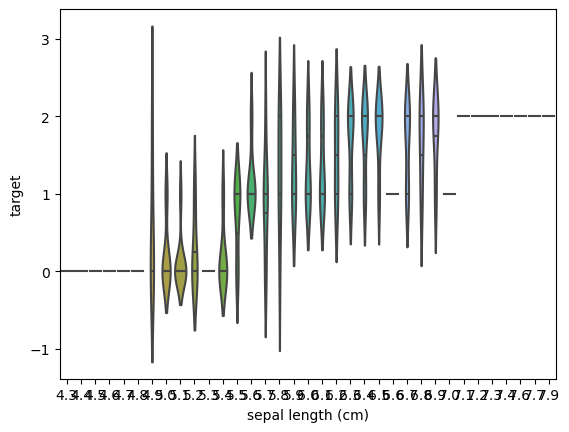

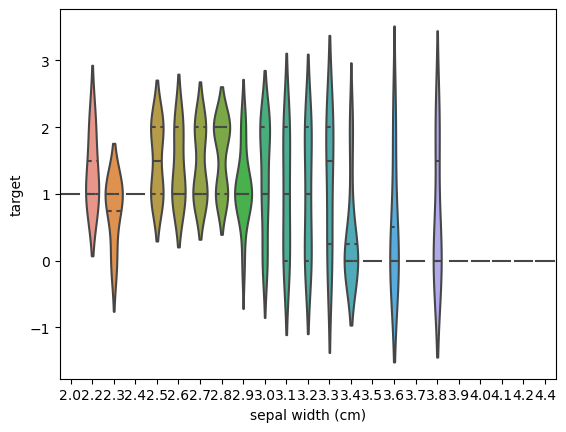

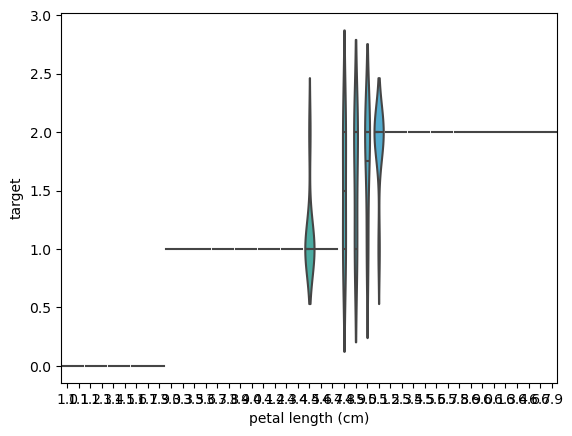

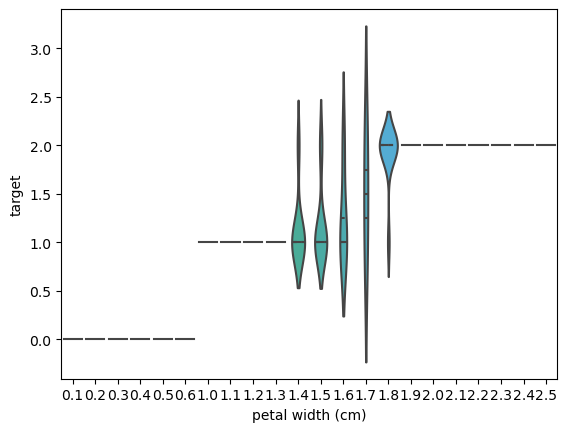

In [8]:
g = sns.violinplot(y='target', x='sepal length (cm)', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='target', x='sepal width (cm)', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='target', x='petal length (cm)', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='target', x='petal width (cm)', data=data, inner='quartile')
plt.show()

# Modeling with scikit-learn

In [9]:
X = data.drop(['target'], axis=1)
y = data['target']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


## Train and test on the same dataset
- This method is not suggested since the end goal is to predict iris species using a dataset the model has not seen before.
- There is also a risk of overfitting the training data.

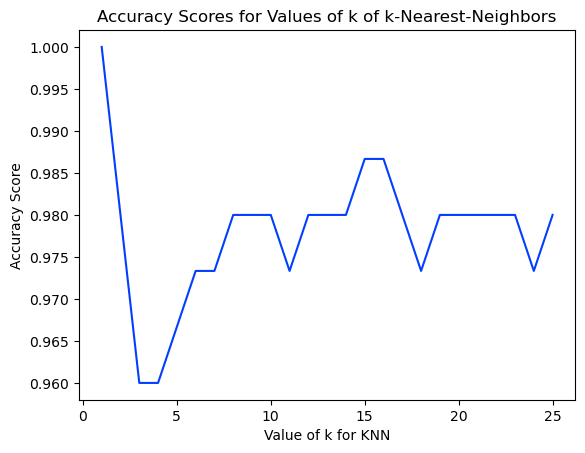

In [10]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [11]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


D:\machine_learning\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Split the dataset into a training set and a testing set

### Advantages
- By splitting the dataset pseudo-randomly into a two separate sets, we can train using one set and test using another.
- This ensures that we won't use the same observations in both sets.
- More flexible and faster than creating a model using all of the dataset for training.

### Disadvantages
- The accuracy scores for the testing set can vary depending on what observations are in the set. 
- This disadvantage can be countered using k-fold cross-validation.

### Notes
- The accuracy score of the models depends on the observations in the testing set, which is determined by the seed of the pseudo-random number generator (random_state parameter).
- As a model's complexity increases, the training accuracy (accuracy you get when you train and test the model on the same data) increases.
- If a model is too complex or not complex enough, the testing accuracy is lower.
- For KNN models, the value of k determines the level of complexity. A lower value of k means that the model is more complex.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


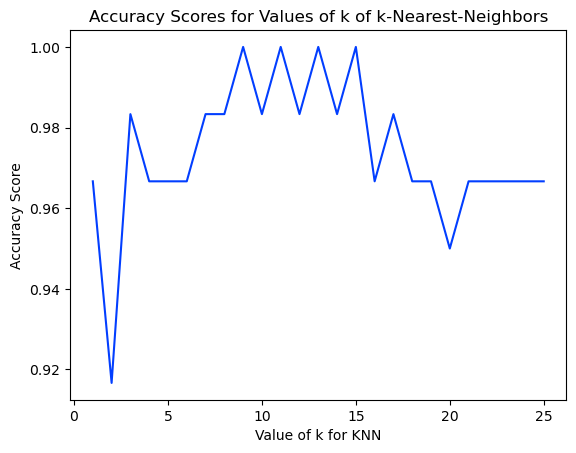

In [13]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


D:\machine_learning\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Choosing KNN to Model Iris Species Prediction with k = 12
After seeing that a value of k = 12 is a pretty good number of neighbors for this model, I used it to fit the model for the entire dataset instead of just the training set.

In [15]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
print("setosa" if knn.predict([[5, 4, 3, 3]]) == 0 else ("versicolor" if knn.predict([[6, 3, 4, 2]]) == 1 else "virginica"))

versicolor


D:\machine_learning\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\machine_learning\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
